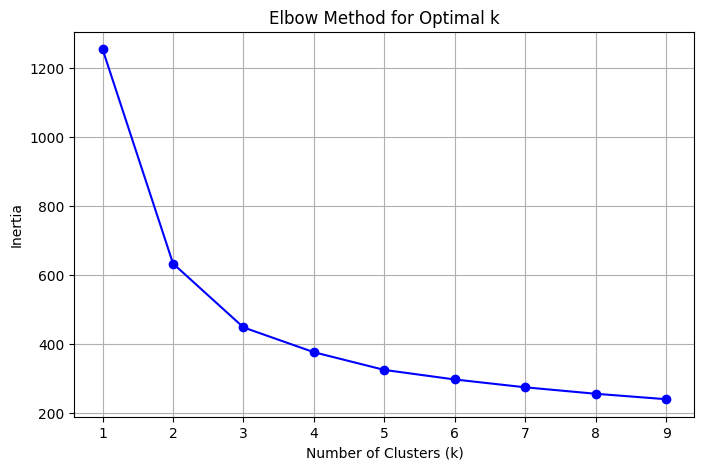

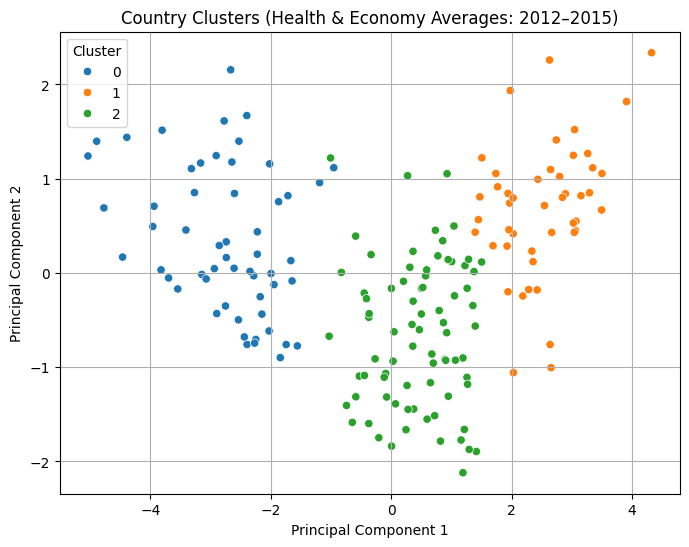

                Country  Cluster  GDP_per_capita  Life_expectancy     BMI  \
0           Afghanistan        0          562.00           62.750  23.100   
97           Madagascar        0          465.00           64.900  21.200   
93              Liberia        0          732.25           61.475  23.975   
92              Lesotho        0         1118.00           49.250  24.850   
177              Zambia        0         1324.50           60.175  22.400   
..                  ...      ...             ...              ...     ...   
75            Indonesia        2         3158.50           70.350  22.850   
35             Colombia        2         5935.75           76.200  26.000   
76   Iran, Islamic Rep.        2         5251.50           75.325  26.000   
11              Bahrain        2        22144.50           76.550  24.875   
133  Russian Federation        2         9483.00           70.650  26.175   

     Schooling  Alcohol_consumption  Infant_deaths  Adult_mortality  
0    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/ajays/Downloads/Life-Expectancy-Data-Updated.csv")


features = [
    'GDP_per_capita', 'Life_expectancy', 'BMI',
    'Schooling', 'Alcohol_consumption', 'Infant_deaths', 'Adult_mortality'
]

df_filtered = df[df['Year'].between(2012, 2015)][['Country'] + features].dropna()

# Average data per country
df_grouped = df_filtered.groupby('Country', as_index=False).mean()

# Normalize feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[features])

# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_grouped['Cluster'] = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_grouped['PC1'] = X_pca[:, 0]
df_grouped['PC2'] = X_pca[:, 1]

#Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_grouped, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("Country Clusters (Health & Economy Averages: 2012–2015)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print(df_grouped[['Country', 'Cluster'] + features].sort_values(by='Cluster'))


In [ ]:

cluster_summary = df_grouped.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)

         GDP_per_capita  Life_expectancy    BMI  Schooling  \
Cluster                                                      
0               1738.62            61.01  23.05       4.60   
1              33648.15            79.46  26.48      11.70   
2               7176.17            73.10  26.62       8.77   

         Alcohol_consumption  Infant_deaths  Adult_mortality  
Cluster                                                       
0                       2.65          53.15           273.41  
1                       9.14           4.38            86.68  
2                       3.70          16.40           141.87  


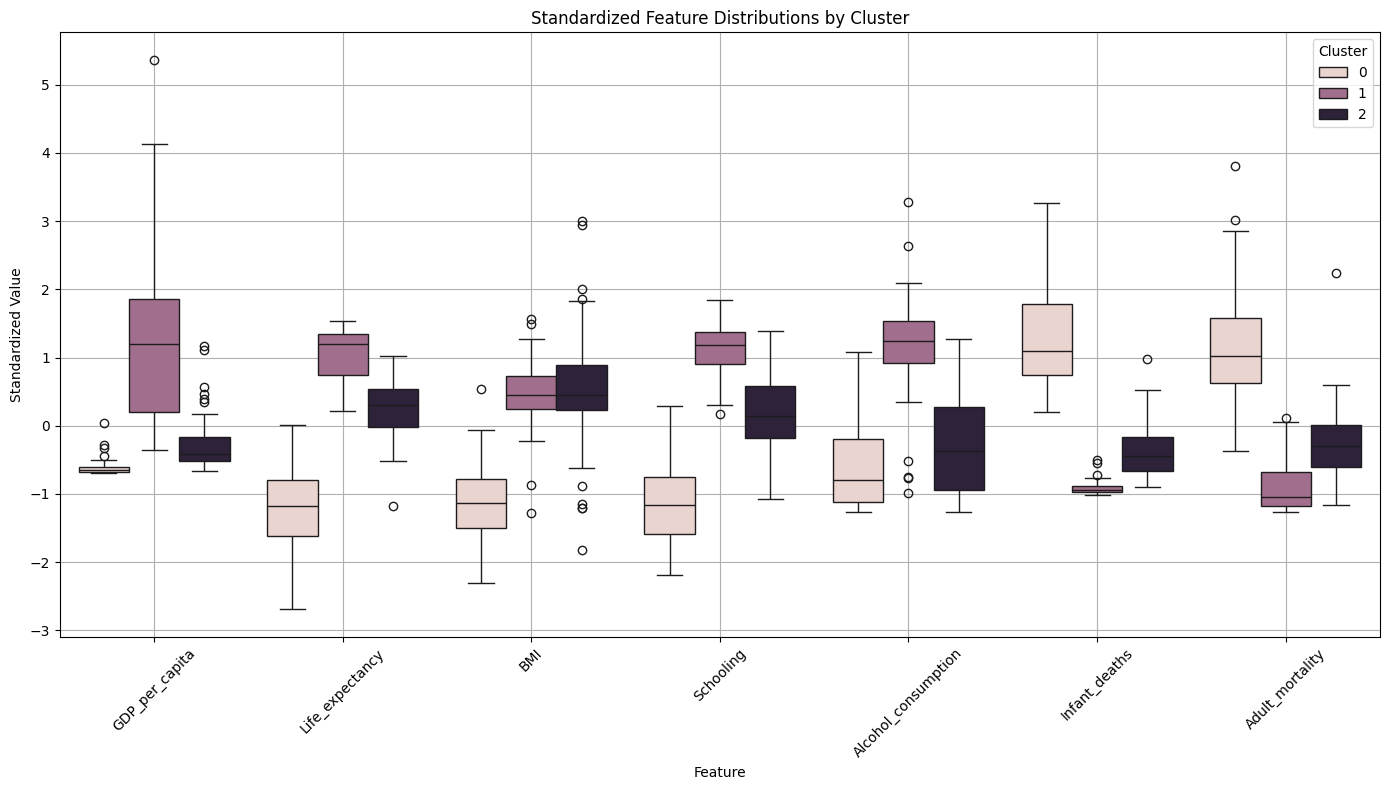

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


features = [
    'GDP_per_capita', 'Life_expectancy', 'BMI',
    'Schooling', 'Alcohol_consumption', 'Infant_deaths', 'Adult_mortality'
]


scaler = StandardScaler()
df_scaled = df_grouped.copy()
df_scaled[features] = scaler.fit_transform(df_grouped[features])


df_melted = df_scaled.melt(id_vars='Cluster', value_vars=features)


plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='variable', y='value', hue='Cluster')
plt.title("Standardized Feature Distributions by Cluster")
plt.xlabel("Feature")
plt.ylabel("Standardized Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
for c in sorted(df_grouped['Cluster'].unique()):
    print(f"\nCluster {c} Countries:")
    print(df_grouped[df_grouped['Cluster'] == c]['Country'].tolist())



Cluster 0 Countries:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

Cluster 1 Countries:
['Antigua and Barbuda', 'Australia', 'Austria', 'Bahamas, The', 'Barbados', 'Belarus', 'Belgium', 'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy

# Can countries be naturally grouped based on their health and economic indicators?

using K-Means clustering, we were able to naturally group countries into three distinct clusters based on their average health and economic indicators between 2012 and 2015. These clusters revealed clear and interpretable patterns:

Cluster 1 included wealthy and healthy countries with high GDP per capita, high life expectancy, strong education levels, and low mortality.

Cluster 2 grouped mid-tier nations, with moderate GDP and mixed health outcomes, reflecting emerging economies in transition.

Cluster 0 captured low-income, high-risk countries with poor health indicators, low schooling, and high infant/adult mortality rates